In [13]:
import pandas as pd
app = pd.read_csv("C:\\Users\\Trinh\\Desktop\\GWU\\Fall 2019\\Intro to Data Mining\\Project\\google-play-store-apps\\googleplaystore.csv")
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Standard quick checks
def dfChkBasics(dframe): 
  cnt = 1  
  try:
    print(str(cnt)+': info(): ')
    print(dframe.info())
  except: pass

  cnt+=1
  print(str(cnt)+': describe(): ')
  print(dframe.describe())

  cnt+=1
  print(str(cnt)+': dtypes: ')
  print(dframe.dtypes)

  try:
    cnt+=1
    print(str(cnt)+': columns: ')
    print(dframe.columns)
  except: pass

  cnt+=1
  print(str(cnt)+': head() -- ')
  print(dframe.head())

  cnt+=1
  print(str(cnt)+': shape: ')
  print(dframe.shape)

  # cnt+=1
  # print(str(cnt)+': columns.value_counts(): ')
  # print(dframe.columns.value_counts())

def dfChkValueCnts(dframe):
  cnt = 1
  for i in dframe.columns :
    print(str(cnt)+':', i, 'value_counts(): ')
    print(dframe[i].value_counts())
    cnt +=1

In [4]:
# Do a quick check
dfChkBasics(app)
dfChkValueCnts(app)

1: info(): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
2: describe(): 
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
3: dtypes: 
App                object
Category           object
Rating            float64
Reviews            objec

The dataset has 10841 rows and 13 columns. There are duplicates in App names. Let's drop duplicates.

In [14]:
appc = app.drop_duplicates(subset=['App'], keep = 'first')
print(appc.shape)

(9660, 13)


In [32]:
appc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null object
Type              9659 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


In [33]:
# Remove NAs
app_clean = appc.dropna()

In [34]:
app_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


Now we have 8190 rows in the dataset.

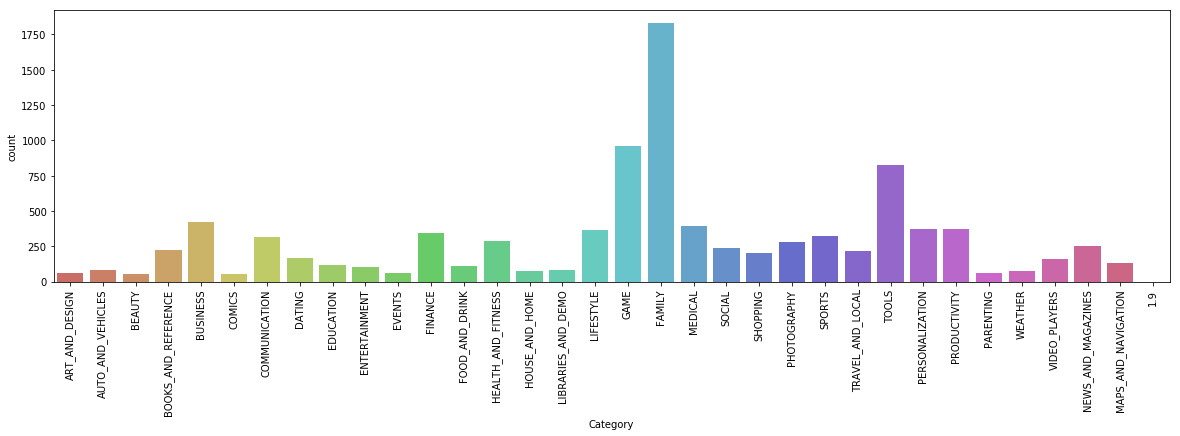

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
fig = sns.countplot(x=app_clean['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

In [37]:
app_clean.Rating.value_counts()

4.3    897
4.4    894
4.5    847
4.2    809
4.6    683
4.1    620
4.0    512
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     62
2.9     45
2.8     40
2.6     24
2.7     23
2.3     20
2.5     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.8      8
1.7      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

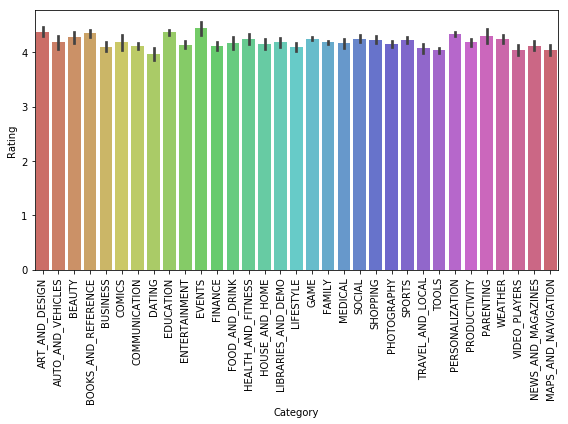

In [42]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=app_clean['Category'], y=app_clean['Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

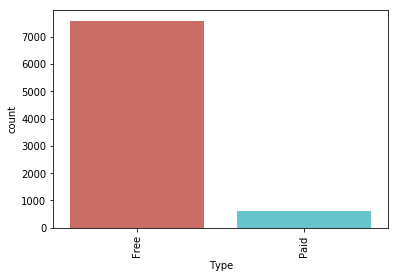

In [41]:
fig = sns.countplot(x=app_clean['Type'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

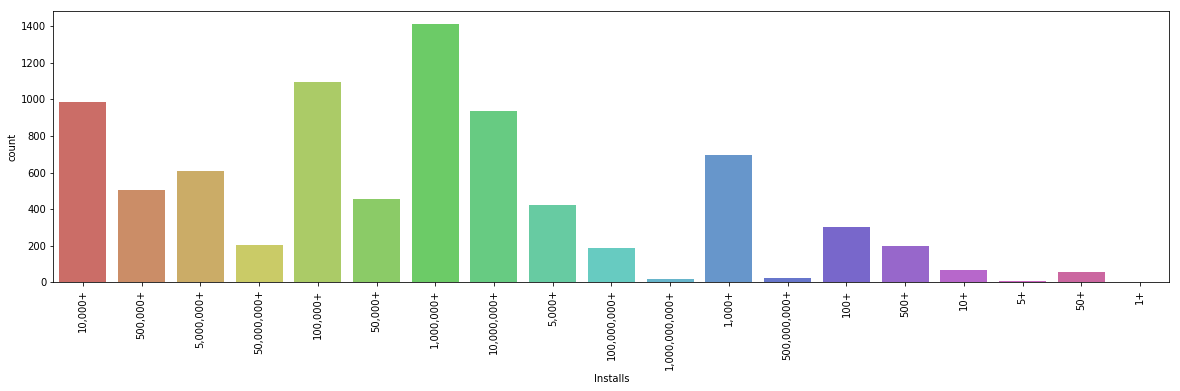

In [44]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x=app_clean['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)